In [1]:
import nba_api
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from sklearn import linear_model

In [2]:
from nba_api.stats import endpoints

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.static import players
from nba_api.stats.static  import teams

# 搜尋

In [3]:
team_dict = teams.get_teams()
team_dict =pd.DataFrame(team_dict[0:30])
team_dict

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [4]:
team_dict['abbreviation']

0     ATL
1     BOS
2     CLE
3     NOP
4     CHI
5     DAL
6     DEN
7     GSW
8     HOU
9     LAC
10    LAL
11    MIA
12    MIL
13    MIN
14    BKN
15    NYK
16    ORL
17    IND
18    PHI
19    PHX
20    POR
21    SAC
22    SAS
23    OKC
24    TOR
25    UTA
26    MEM
27    WAS
28    DET
29    CHA
Name: abbreviation, dtype: object

In [5]:
player_dict = players.get_players()
pd.DataFrame(player_dict)

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False
...,...,...,...,...,...
4810,1627790,Ante Zizic,Ante,Zizic,False
4811,78647,Jim Zoet,Jim,Zoet,False
4812,78648,Bill Zopf,Bill,Zopf,False
4813,1627826,Ivica Zubac,Ivica,Zubac,True


In [6]:
player =[player for player in player_dict if player['full_name']=='Damian Lillard'][0]
player['id']

203081

In [7]:
id=203081
playerfinder = leaguegamefinder.LeagueGameFinder(player_id_nullable=id)
player = playerfinder.get_data_frames()[0] 
print(player.shape)
player['EFF'] =player.PTS+player.REB+player.AST+player.STL+player.BLK-player.FGA+player.FGM-player.FTA+player.FTM-player.TOV
player['eFG'] =(player.FGM+0.5*player.FG3M)/player.FGA
player['TS'] =player.PTS/(2*(player.FGA+0.44*player.FTA))
player 

(899, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,EFF,eFG,TS
0,22022,1610612757,POR,Portland Trail Blazers,0022201091,2023-03-22,POR @ UTA,W,34,30,...,7,12,0,0,2,1,3.6,34,0.473684,0.596184
1,22022,1610612757,POR,Portland Trail Blazers,0022201069,2023-03-19,POR vs. LAC,L,39,21,...,7,9,1,1,4,0,-4.0,21,0.264706,0.462148
2,22022,1610612757,POR,Portland Trail Blazers,0022201053,2023-03-17,POR vs. BOS,L,37,41,...,4,5,1,1,7,3,-2.8,31,0.652174,0.703018
3,22022,1610612757,POR,Portland Trail Blazers,0022201034,2023-03-14,POR vs. NYK,L,39,38,...,7,7,0,0,4,3,-1.0,32,0.576923,0.634179
4,22022,1610612757,POR,Portland Trail Blazers,0022200998,2023-03-10,POR @ PHI,L,39,22,...,6,11,0,0,2,2,0.6,28,0.466667,0.593952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,12012,1610612757,POR,Portland Trail Blazers,0011200091,2012-10-22,POR vs. UTA,W,33,21,...,4,8,2,0,6,2,1.2,26,0.937500,0.947653
895,12012,1610612757,POR,Portland Trail Blazers,0011200076,2012-10-19,POR vs. GSW,L,31,15,...,2,7,0,0,1,2,0.6,16,0.458333,0.545058
896,12012,1610612757,POR,Portland Trail Blazers,0011200050,2012-10-15,POR @ SAC,L,28,20,...,2,3,1,0,4,2,-2.6,15,0.642857,0.672043
897,12012,1610612757,POR,Portland Trail Blazers,0011200035,2012-10-12,POR @ PHX,L,35,15,...,1,5,0,0,5,2,-1.0,8,0.423077,0.508130


In [8]:
# Here we access the leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Our "data" variable now has built in functions such as creating a dataframe for our data
df = data.league_leaders.get_data_frame()

In [9]:
df.head(100)

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1628401,96,Derrick White,1610612738,BOS,82,2319,350,758,0.462,...,293,321,54,76,95,177,1017,1234,3.38,0.57
96,1629652,97,Luguentz Dort,1610612760,OKC,74,2272,339,873,0.388,...,344,154,75,23,92,243,1013,924,1.67,0.81
97,1631095,98,Jabari Smith Jr.,1610612745,HOU,79,2451,364,892,0.408,...,569,101,43,74,104,227,1010,1121,0.97,0.41
98,1627763,99,Malcolm Brogdon,1610612738,BOS,67,1744,354,732,0.484,...,280,248,45,18,98,109,1000,1091,2.53,0.46


In [10]:
print(df.shape)
print(df.info())

(539, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PLAYER_ID  539 non-null    int64  
 1   RANK       539 non-null    int64  
 2   PLAYER     539 non-null    object 
 3   TEAM_ID    539 non-null    int64  
 4   TEAM       539 non-null    object 
 5   GP         539 non-null    int64  
 6   MIN        539 non-null    int64  
 7   FGM        539 non-null    int64  
 8   FGA        539 non-null    int64  
 9   FG_PCT     539 non-null    float64
 10  FG3M       539 non-null    int64  
 11  FG3A       539 non-null    int64  
 12  FG3_PCT    539 non-null    float64
 13  FTM        539 non-null    int64  
 14  FTA        539 non-null    int64  
 15  FT_PCT     539 non-null    float64
 16  OREB       539 non-null    int64  
 17  DREB       539 non-null    int64  
 18  REB        539 non-null    int64  
 19  AST        539 non-null    int64  
 20  

In [11]:
# First we need to get per game stats.
# We divide each variable by games played (GP) to get per game average
x, y = df.FGA/df.GP, df.PTS/df.GP 

# we have to reshape our array from 1d to 2d. 
# The proper shaped array is an input requirement for the linear model
# reshaping is usually an issue when using 1 x variable
x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)     



""" Build and fit linea regression model """
# create an object that contains the linear model class
# Fit our modeling using FGA (x) and PPG (y)
model = linear_model.LinearRegression()    
model.fit(x,y)                             

# Get our r2 value and round it to 2 decimals. How much variance is exaplained?
# Get our predicted y values for x
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)      

Text([13.72413793], [30.17241379], 'Damian Lillard')

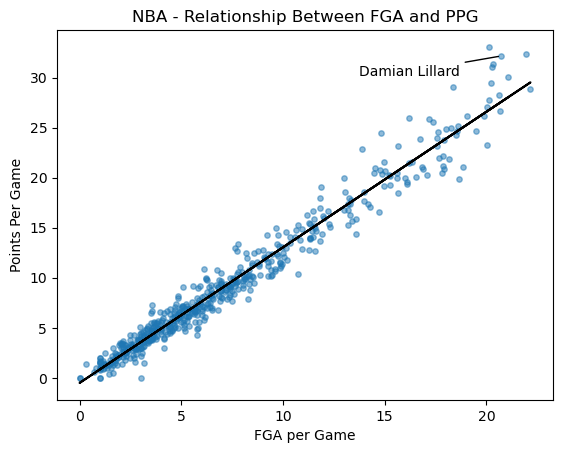

In [12]:
# Now, lets make a plot with matplot lib using a iterative approach (which is easy to read)

plt.scatter(x, y, s=15, alpha=.5)                            # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
plt.plot(x, predicted_y, color = 'black')                    # line: Add line for regression line w/ predicted values
plt.title('NBA - Relationship Between FGA and PPG')          # Give it a title
plt.xlabel('FGA per Game')                                   # Label x-axis
plt.ylabel('Points Per Game')                                # Label y-axis
#plt.text(10,25, f'R2={r2}')                                  # 10, 25 are the coordinates for our text. Adjust accordingly
plt.annotate(df.PLAYER[10],                       # This the name of the top scoring player. Refer to the .head() from earlier
             (x[10], y[10]),                       # This is the point we want to annotate.  
             (x[10]-7,y[10]-2),                    # These are coords for the text
             arrowprops=dict(arrowstyle='-'))    # Here we use a flat line for the arrow '-'


# Finally, let's save an image called 'graph.png'. 
# We'll set the dpi (dots per inch) to 300, so we have a nice looking picture.

# 球員AV值

In [13]:
salary_df = pd.read_csv("salary_df2.csv")

salary_df = salary_df.iloc[:,0:8]

salary_df = salary_df.fillna(0)

salary_df

,Rk,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28
0,1,Stephen Curry,48070014,51915615.0,55761216.0,59606817.0,0.0,0.0
1,2,Russell Westbrook,47559433,0.0,0.0,0.0,0.0,0.0
2,511,Russell Westbrook,47559433,0.0,0.0,0.0,0.0,0.0
3,10,John Wall,47345760,6802950.0,0.0,0.0,0.0,0.0
4,195,John Wall,47345760,6802950.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
515,520,Meyers Leonard,105522,0.0,0.0,0.0,0.0,0.0
516,538,Meyers Leonard,105522,0.0,0.0,0.0,0.0,0.0
517,539,Meyers Leonard,105522,0.0,0.0,0.0,0.0,0.0
518,552,Demetrius Jackson,92857,92857.0,0.0,0.0,0.0,0.0


In [14]:
salary_df[salary_df["Player"] == 'LeBron James']

,Rk,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28
5,3,LeBron James,44474988,53369986.0,57639585.0,0.0,0.0,0.0


In [15]:
df

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1631214,535,Alondes Williams,1610612751,BKN,1,5,0,0,0.000,...,1,0,0,0,2,1,0,-1,0.00,0.00
535,1629126,535,Deonte Burton,1610612758,SAC,2,7,0,2,0.000,...,0,0,0,0,0,0,0,-2,0.00,0.00
536,1628402,535,Frank Jackson,1610612762,UTA,1,5,0,3,0.000,...,2,1,0,0,0,0,0,0,0.00,0.00
537,1630701,535,Michael Foster Jr.,1610612755,PHI,1,1,0,0,0.000,...,0,0,0,0,0,0,0,0,0.00,0.00


In [16]:
complete_df=df.merge(salary_df,how="left", left_on="PLAYER", right_on="Player")
complete_df=complete_df.dropna()
complete_df

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,AST_TOV,STL_TOV,Rk,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,1.61,0.37,42.0,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,1.21,0.29,28.0,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,2.24,0.38,19.0,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,1.93,0.58,36.0,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,1.46,0.21,7.0,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1629685,522,Dylan Windler,1610612739,CLE,3,10,2,3,0.667,...,1.00,1.00,258.0,Dylan Windler,4037278.0,0.0,0.0,0.0,0.0,0.0
580,1631320,532,Chima Moneke,1610612758,SAC,2,8,1,2,0.500,...,0.50,0.00,510.0,Chima Moneke,500000.0,0.0,0.0,0.0,0.0,0.0
582,1630649,532,Stanley Umude,1610612765,DET,1,2,0,1,0.000,...,0.00,0.00,558.0,Stanley Umude,58493.0,0.0,0.0,0.0,0.0,0.0
587,1628425,535,Sterling Brown,1610612747,LAL,4,24,0,4,0.000,...,0.00,0.00,294.0,Sterling Brown,3000000.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Credits Formula
complete_df["Credits"]=complete_df["PTS"]+complete_df["REB"]+complete_df["AST"]+complete_df["STL"]+\
                       complete_df["BLK"]-(complete_df["FGA"]-complete_df["FGM"])-(complete_df["FTA"]-\
                       complete_df["FTM"])-complete_df["TOV"]

complete_df["AV"]=(complete_df["Credits"]**(0.75))/21



complete_df["MIN"]=pd.to_numeric(complete_df["MIN"])
complete_df["$/minute-22/23"]=complete_df["2022-23"]/complete_df["MIN"]

In [18]:
complete_df['MIN']=complete_df['MIN']/complete_df['GP']
complete_df['FGM']=complete_df['FGM']/complete_df['GP']
complete_df['FGA']=complete_df['FGA']/complete_df['GP']
complete_df['FG3M']=complete_df['FG3M']/complete_df['GP']
complete_df['FG3A']=complete_df['FG3A']/complete_df['GP']
complete_df['FTM']=complete_df['FTM']/complete_df['GP']
complete_df['FG3A']=complete_df['FG3A']/complete_df['GP']
complete_df['FTM']=complete_df['FTM']/complete_df['GP']
complete_df['FTA']=complete_df['FTA']/complete_df['GP']
complete_df['OREB']=complete_df['OREB']/complete_df['GP']
complete_df['DREB']=complete_df['DREB']/complete_df['GP']
complete_df['REB']=complete_df['REB']/complete_df['GP']
complete_df['AST']=complete_df['AST']/complete_df['GP']
complete_df['STL']=complete_df['STL']/complete_df['GP']
complete_df['BLK']=complete_df['BLK']/complete_df['GP']
complete_df['TOV']=complete_df['TOV']/complete_df['GP']
complete_df['PF']=complete_df['PF']/complete_df['GP']
complete_df['PTS']=complete_df['PTS']/complete_df['GP']
complete_df['EFF']=complete_df['EFF']/complete_df['GP']
complete_df

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1629685,522,Dylan Windler,1610612739,CLE,3,3.333333,0.666667,1.000000,0.667,...,Dylan Windler,4037278.0,0.0,0.0,0.0,0.0,0.0,5,0.159224,403727.800000
580,1631320,532,Chima Moneke,1610612758,SAC,2,4.000000,0.500000,1.000000,0.500,...,Chima Moneke,500000.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,62500.000000
582,1630649,532,Stanley Umude,1610612765,DET,1,2.000000,0.000000,1.000000,0.000,...,Stanley Umude,58493.0,0.0,0.0,0.0,0.0,0.0,3,0.108548,29246.500000
587,1628425,535,Sterling Brown,1610612747,LAL,4,6.000000,0.000000,1.000000,0.000,...,Sterling Brown,3000000.0,0.0,0.0,0.0,0.0,0.0,9,0.247436,125000.000000


In [19]:
complete_df.describe()

,PLAYER_ID,RANK,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,Rk,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
count,4.880000e+02,488.000000,4.880000e+02,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,488.000000,488.000000,488.000000
mean,1.218748e+06,250.043033,1.610613e+09,51.641393,20.670537,3.517839,7.496034,0.463141,1.044623,0.083105,...,265.674180,9.446244e+06,7.950414e+06,5.983153e+06,4.176159e+06,1.934595e+06,6.489664e+05,642.010246,5.670790,13057.306450
std,6.483945e+05,144.547741,8.558040e+00,22.004304,9.006530,2.422275,4.938187,0.094896,0.868196,0.195525,...,157.449886,1.108342e+07,1.145850e+07,1.180607e+07,1.123563e+07,9.111148e+06,5.899723e+06,521.767547,3.690403,30495.026796
min,2.544000e+03,1.000000,1.610613e+09,1.000000,2.000000,0.000000,0.727273,0.000000,0.000000,0.000000,...,1.000000,5.849300e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,211.928033
25%,2.039258e+05,126.750000,1.610613e+09,37.000000,13.751819,1.800000,3.783333,0.416750,0.360119,0.029587,...,133.750000,1.930681e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,219.250000,2.713214,2702.665433
50%,1.628980e+06,251.000000,1.610613e+09,57.000000,19.821391,2.775522,6.107625,0.452500,0.831301,0.053155,...,260.500000,4.408264e+06,2.594200e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,521.500000,5.196625,6169.558169
75%,1.630219e+06,366.000000,1.610613e+09,69.000000,28.544311,4.590210,9.827922,0.500000,1.514122,0.081913,...,398.250000,1.208037e+07,1.040365e+07,5.730232e+06,0.000000e+00,0.000000e+00,0.000000e+00,975.750000,8.313506,12494.438702
max,1.641645e+06,535.000000,1.610613e+09,83.000000,37.352113,11.222222,22.163636,0.819000,4.875000,2.750000,...,559.000000,4.807001e+07,5.336999e+07,5.763958e+07,5.960682e+07,6.322883e+07,6.190800e+07,2622.000000,17.448384,403727.800000


In [20]:
complete_df.corr()

,PLAYER_ID,RANK,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,Rk,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
PLAYER_ID,1.000000,0.006644,0.163884,0.069816,-0.062711,-0.062001,-0.051433,-0.062428,-0.077934,0.017526,...,0.211812,-0.400908,-0.185685,-0.095272,-0.039314,-0.021878,0.022246,-0.044710,-0.037793,-0.147132
RANK,0.006644,1.000000,0.046297,-0.822685,-0.910139,-0.863390,-0.854084,-0.265587,-0.647422,0.161340,...,0.653755,-0.547834,-0.600569,-0.481936,-0.424540,-0.281683,-0.133116,-0.918453,-0.948619,0.260906
TEAM_ID,0.163884,0.046297,1.000000,-0.096253,-0.031100,-0.016157,0.002447,-0.096311,-0.056704,0.018096,...,0.102056,-0.156186,-0.079107,-0.112368,-0.065691,-0.052330,-0.039835,-0.083485,-0.076456,-0.116423
GP,0.069816,-0.822685,-0.096253,1.000000,0.634854,0.466994,0.455505,0.261065,0.397418,-0.314468,...,-0.443548,0.239688,0.284439,0.192219,0.171548,0.084767,-0.000708,0.717474,0.773318,-0.394669
MIN,-0.062711,-0.910139,-0.031100,0.634854,1.000000,0.884183,0.887591,0.204138,0.678085,0.007647,...,-0.676642,0.603983,0.642588,0.508544,0.438367,0.299242,0.158647,0.868162,0.888283,-0.168762
FGM,-0.062001,-0.863390,-0.016157,0.466994,0.884183,1.000000,0.977382,0.255635,0.635509,0.050159,...,-0.656056,0.683779,0.751340,0.661142,0.587669,0.427477,0.244053,0.872201,0.863808,-0.083004
FGA,-0.051433,-0.854084,0.002447,0.455505,0.887591,0.977382,1.000000,0.098159,0.732700,0.088863,...,-0.642674,0.669262,0.718141,0.616419,0.549419,0.410451,0.210900,0.821173,0.816574,-0.076243
FG_PCT,-0.062428,-0.265587,-0.096311,0.261065,0.204138,0.255635,0.098159,1.000000,-0.172260,-0.182377,...,-0.207101,0.124870,0.169496,0.172669,0.136019,0.068151,0.076159,0.330819,0.351394,-0.104159
FG3M,-0.077934,-0.647422,-0.056704,0.397418,0.678085,0.635509,0.732700,-0.172260,1.000000,0.185391,...,-0.482769,0.463365,0.457963,0.334391,0.305446,0.234402,0.064228,0.503315,0.520608,-0.071673
FG3A,0.017526,0.161340,0.018096,-0.314468,0.007647,0.050159,0.088863,-0.182377,0.185391,1.000000,...,0.076603,0.010635,-0.016475,-0.007938,-0.001732,0.013937,0.004960,-0.128480,-0.156903,0.206484


<Axes: xlabel='$/minute-22/23', ylabel='AV'>

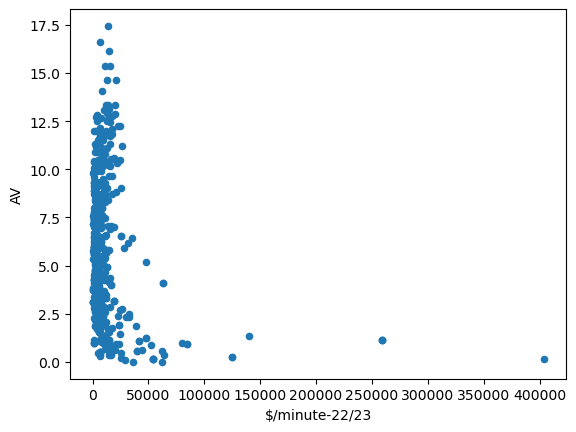

In [21]:
complete_df.plot(kind="scatter",x="$/minute-22/23",y="AV")

In [22]:
complete_df.sort_values(by="AV",ascending=False)[0:10]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
16,203999,17,Nikola Jokic,1610612743,DEN,69,33.666667,9.362319,14.811594,0.632,...,Nikola Jokic,33047803.0,46900000.0,50652000.0,54404000.0,58156000.0,61908000.0,2622,17.448384,14226.346535
28,1627734,29,Domantas Sabonis,1610612758,SAC,79,34.632911,7.303797,11.873418,0.615,...,Domantas Sabonis,18500000.0,19400000.0,0.0,0.0,0.0,0.0,2456,16.613150,6761.695906
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
6,203944,7,Julius Randle,1610612752,NYK,77,35.545455,8.545455,18.597403,0.459,...,Julius Randle,23760000.0,25660800.0,27561600.0,29462400.0,0.0,0.0,1970,14.080899,8681.037632
35,203076,36,Anthony Davis,1610612747,LAL,56,34.017857,9.678571,17.178571,0.563,...,Anthony Davis,37980720.0,40600080.0,43219440.0,0.0,0.0,0.0,1836,13.356271,19937.385827
14,1627783,15,Pascal Siakam,1610612761,TOR,71,37.352113,8.873239,18.492958,0.480,...,Pascal Siakam,35448672.0,37893408.0,0.0,0.0,0.0,0.0,1833,13.339899,13366.769231


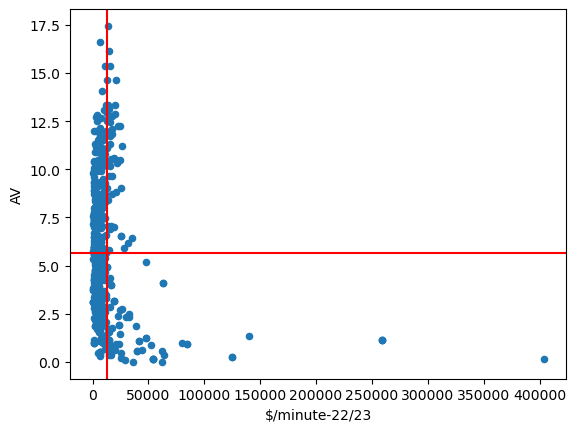

In [23]:
complete_df.plot(kind="scatter",x="$/minute-22/23",y="AV")
plt.axvline(x=complete_df["$/minute-22/23"].mean(),c="red")
plt.axhline(y=complete_df["AV"].mean(),c="red")

In [24]:
dollar_minute_mean=complete_df["$/minute-22/23"].mean()
AV_mean=complete_df["AV"].mean()

good_performers=complete_df[(complete_df["$/minute-22/23"]<dollar_minute_mean) & (complete_df["AV"]>AV_mean)]
good_performers.reset_index(inplace=True)

In [25]:
good_performers[good_performers["2023-24"]==0].sort_values(by="AV",ascending=False)

,index,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
37,59,201572,60,Brook Lopez,1610612749,MIL,78,30.410256,6.115385,11.525641,...,Brook Lopez,13906976.0,0.0,0.0,0.0,0.0,0.0,1518,11.580693,5862.974705
77,114,203486,114,Mason Plumlee,1610612746,LAC,79,25.987342,4.164557,6.126582,...,Mason Plumlee,9080417.0,0.0,0.0,0.0,0.0,0.0,1509,11.529159,4422.999026
74,111,1627751,110,Jakob Poeltl,1610612761,TOR,72,26.472222,5.402778,8.583333,...,Jakob Poeltl,9398148.0,0.0,0.0,0.0,0.0,0.0,1463,11.264553,4930.822665
48,80,1626174,80,Christian Wood,1610612742,DAL,67,25.940299,5.910448,11.477612,...,Christian Wood,14317459.0,0.0,0.0,0.0,0.0,0.0,1270,10.130561,8237.893556
31,51,203924,52,Jerami Grant,1610612757,POR,63,35.650794,6.888889,14.492063,...,Jerami Grant,20955000.0,0.0,0.0,0.0,0.0,0.0,1168,9.513993,9329.919858
75,112,1630200,112,Tre Jones,1610612759,SAS,68,29.176471,5.014706,10.926471,...,Tre Jones,1782621.0,0.0,0.0,0.0,0.0,0.0,1130,9.280888,898.498488
45,75,1629023,75,P.J. Washington,1610612766,CHA,73,32.602740,5.945205,13.397260,...,P.J. Washington,5808435.0,0.0,0.0,0.0,0.0,0.0,1121,9.225394,2440.518908
71,108,1628971,108,Bruce Brown,1610612743,DEN,80,28.487500,4.475000,9.262500,...,Bruce Brown,6479000.0,0.0,0.0,0.0,0.0,0.0,1114,9.182155,2842.913559
73,110,1627747,110,Caris LeVert,1610612739,CLE,74,30.229730,4.324324,10.027027,...,Caris LeVert,18796296.0,0.0,0.0,0.0,0.0,0.0,974,8.302329,8402.456862
81,119,1630559,119,Austin Reaves,1610612747,LAL,64,28.796875,4.046875,7.656250,...,Austin Reaves,1563518.0,0.0,0.0,0.0,0.0,0.0,927,8.000010,848.354856


# 篩選

In [26]:
complete_df[complete_df["AV"]>8.295934]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,203110,192,Draymond Green,1610612744,GSW,73,31.479452,3.424658,6.493151,0.527,...,Draymond Green,25806468.0,27586224.0,0.0,0.0,0.0,0.0,1317,10.410463,11229.968668
195,201143,193,Al Horford,1610612738,BOS,63,30.492063,3.619048,7.603175,0.476,...,Al Horford,26500000.0,10000000.0,9500000.0,0.0,0.0,0.0,992,8.417138,13794.898490
198,1631105,196,Jalen Duren,1610612765,DET,67,24.925373,3.850746,5.940299,0.648,...,Jalen Duren,4124280.0,4330680.0,4536840.0,6483144.0,0.0,0.0,1092,9.045815,2469.628743
205,1626172,203,Kevon Looney,1610612744,GSW,82,23.878049,2.951220,4.682927,0.630,...,Kevon Looney,8000000.0,8500000.0,9000000.0,0.0,0.0,0.0,1399,10.892912,4085.801839


In [27]:
complete_df[complete_df["AV"]>11]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
5,1630162,6,Anthony Edwards,1610612750,MIN,79,35.962025,8.949367,19.506329,0.459,...,Anthony Edwards,10733400.0,13534817.0,0.0,0.0,0.0,0.0,1741,12.834525,3778.035903
6,203944,7,Julius Randle,1610612752,NYK,77,35.545455,8.545455,18.597403,0.459,...,Julius Randle,23760000.0,25660800.0,27561600.0,29462400.0,0.0,0.0,1970,14.080899,8681.037632
7,1628378,8,Donovan Mitchell,1610612739,CLE,68,35.764706,9.985294,20.617647,0.484,...,Donovan Mitchell,30913750.0,33162030.0,35410310.0,37096620.0,0.0,0.0,1686,12.529216,12711.245888
8,1629027,9,Trae Young,1610612737,ATL,73,34.808219,8.178082,19.041096,0.429,...,Trae Young,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,1795,13.131945,14599.173554
9,203897,10,Zach LaVine,1610612741,CHI,77,35.948052,8.740260,18.025974,0.485,...,Zach LaVine,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,1698,12.596038,13401.914740


In [28]:
complete_df[complete_df["AV"]< 1.7]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
415,1630527,388,Brandon Boston Jr.,1610612746,LAC,22,11.272727,2.318182,5.545455,0.418,...,Brandon Boston Jr.,1563518.0,1836096.0,0.0,0.0,0.0,0.0,110,1.617429,6304.508065
452,1627854,420,Bryn Forbes,1610612750,MIN,25,10.720000,1.200000,3.320000,0.361,...,Bryn Forbes,1836090.0,0.0,0.0,0.0,0.0,0.0,65,1.090098,6851.082090
453,1628432,420,Davon Reed,1610612747,LAL,43,7.976744,0.651163,1.953488,0.333,...,Davon Reed,1902133.0,0.0,0.0,0.0,0.0,0.0,106,1.573114,5545.577259
455,1630678,420,Terry Taylor,1610612741,CHI,31,8.483871,1.258065,2.419355,0.520,...,Terry Taylor,1563518.0,0.0,0.0,0.0,0.0,0.0,105,1.561970,5944.935361
457,1631207,425,Dalen Terry,1610612741,CHI,38,5.631579,0.842105,1.894737,0.444,...,Dalen Terry,3191400.0,3350760.0,3510480.0,5399118.0,0.0,0.0,105,1.561970,14913.084112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1629685,522,Dylan Windler,1610612739,CLE,3,3.333333,0.666667,1.000000,0.667,...,Dylan Windler,4037278.0,0.0,0.0,0.0,0.0,0.0,5,0.159224,403727.800000
580,1631320,532,Chima Moneke,1610612758,SAC,2,4.000000,0.500000,1.000000,0.500,...,Chima Moneke,500000.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,62500.000000
582,1630649,532,Stanley Umude,1610612765,DET,1,2.000000,0.000000,1.000000,0.000,...,Stanley Umude,58493.0,0.0,0.0,0.0,0.0,0.0,3,0.108548,29246.500000
587,1628425,535,Sterling Brown,1610612747,LAL,4,6.000000,0.000000,1.000000,0.000,...,Sterling Brown,3000000.0,0.0,0.0,0.0,0.0,0.0,9,0.247436,125000.000000


In [29]:
complete_df[complete_df["$/minute-22/23"] > 40000]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
233,203114,229,Khris Middleton,1610612749,MIL,33,24.272727,5.363636,12.303030,0.436,...,Khris Middleton,37948276.0,0.0,0.0,0.0,0.0,0.0,518,5.170446,47376.124844
272,202322,266,John Wall,1610612746,LAC,34,22.205882,4.058824,9.941176,0.408,...,John Wall,47345760.0,6802950.0,0.0,0.0,0.0,0.0,379,4.090347,62709.615894
273,202322,266,John Wall,1610612746,LAC,34,22.205882,4.058824,9.941176,0.408,...,John Wall,47345760.0,6802950.0,0.0,0.0,0.0,0.0,379,4.090347,62709.615894
462,202689,430,Kemba Walker,1610612742,DAL,9,16.000000,2.666667,6.333333,0.421,...,Kemba Walker,37281261.0,0.0,0.0,0.0,0.0,0.0,70,1.152403,258897.645833
463,202689,430,Kemba Walker,1610612742,DAL,9,16.000000,2.666667,6.333333,0.421,...,Kemba Walker,37281261.0,0.0,0.0,0.0,0.0,0.0,70,1.152403,258897.645833
464,202689,430,Kemba Walker,1610612742,DAL,9,16.000000,2.666667,6.333333,0.421,...,Kemba Walker,37281261.0,0.0,0.0,0.0,0.0,0.0,70,1.152403,258897.645833
467,201980,433,Danny Green,1610612739,CLE,11,12.636364,2.000000,4.454545,0.449,...,Danny Green,11710528.0,0.0,0.0,0.0,0.0,0.0,53,0.935379,84248.402878
468,201980,433,Danny Green,1610612739,CLE,11,12.636364,2.000000,4.454545,0.449,...,Danny Green,11710528.0,0.0,0.0,0.0,0.0,0.0,53,0.935379,84248.402878
474,1628371,439,Jonathan Isaac,1610612753,ORL,11,11.272727,2.000000,4.818182,0.415,...,Jonathan Isaac,17400000.0,17400000.0,17400000.0,0.0,0.0,0.0,84,1.321266,140322.580645
483,1628464,447,Daniel Theis,1610612754,IND,7,15.571429,3.000000,6.285714,0.477,...,Daniel Theis,8694369.0,9108387.0,9522405.0,0.0,0.0,0.0,55,0.961729,79764.853211


In [30]:
complete_df1=complete_df[(complete_df["AV"] > 1.7) & (complete_df["$/minute-22/23"] < 40000)]
complete_df1

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,203469,416,Cody Zeller,1610612748,MIA,15,14.466667,2.466667,3.933333,0.627,...,Cody Zeller,517060.0,0.0,0.0,0.0,0.0,0.0,132,1.854433,2382.764977
448,203469,416,Cody Zeller,1610612748,MIA,15,14.466667,2.466667,3.933333,0.627,...,Cody Zeller,517060.0,0.0,0.0,0.0,0.0,0.0,132,1.854433,2382.764977
450,1629033,418,Theo Pinson,1610612742,DAL,40,8.075000,0.775000,2.175000,0.356,...,Theo Pinson,1836090.0,0.0,0.0,0.0,0.0,0.0,141,1.948476,5684.489164
454,1626163,420,Frank Kaminsky,1610612745,HOU,36,6.527778,0.861111,1.750000,0.492,...,Frank Kaminsky,1836090.0,0.0,0.0,0.0,0.0,0.0,140,1.938102,7813.148936


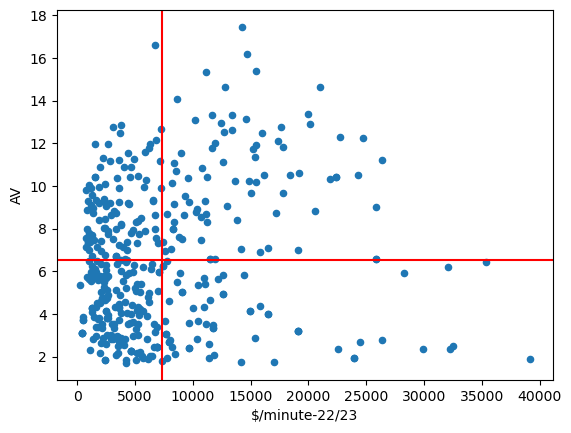

In [31]:
complete_df1.plot(kind="scatter",x="$/minute-22/23",y="AV")
plt.axvline(x=complete_df1["$/minute-22/23"].mean(),c="red")
plt.axhline(y=complete_df1["AV"].mean(),c="red")

In [32]:
dollar_minute_mean=complete_df1["$/minute-22/23"].mean()
AV_mean=complete_df1["AV"].mean()

good_performers=complete_df1[(complete_df1["$/minute-22/23"]<dollar_minute_mean) & (complete_df1["AV"]>AV_mean)]
good_performers.reset_index(inplace=True)

In [33]:
good_performers[good_performers["2023-24"]==0].sort_values(by="AV",ascending=False)

,index,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
21,59,201572,60,Brook Lopez,1610612749,MIL,78,30.410256,6.115385,11.525641,...,Brook Lopez,13906976.0,0.0,0.0,0.0,0.0,0.0,1518,11.580693,5862.974705
49,114,203486,114,Mason Plumlee,1610612746,LAC,79,25.987342,4.164557,6.126582,...,Mason Plumlee,9080417.0,0.0,0.0,0.0,0.0,0.0,1509,11.529159,4422.999026
47,111,1627751,110,Jakob Poeltl,1610612761,TOR,72,26.472222,5.402778,8.583333,...,Jakob Poeltl,9398148.0,0.0,0.0,0.0,0.0,0.0,1463,11.264553,4930.822665
48,112,1630200,112,Tre Jones,1610612759,SAS,68,29.176471,5.014706,10.926471,...,Tre Jones,1782621.0,0.0,0.0,0.0,0.0,0.0,1130,9.280888,898.498488
28,75,1629023,75,P.J. Washington,1610612766,CHA,73,32.602740,5.945205,13.397260,...,P.J. Washington,5808435.0,0.0,0.0,0.0,0.0,0.0,1121,9.225394,2440.518908
45,108,1628971,108,Bruce Brown,1610612743,DEN,80,28.487500,4.475000,9.262500,...,Bruce Brown,6479000.0,0.0,0.0,0.0,0.0,0.0,1114,9.182155,2842.913559
52,119,1630559,119,Austin Reaves,1610612747,LAL,64,28.796875,4.046875,7.656250,...,Austin Reaves,1563518.0,0.0,0.0,0.0,0.0,0.0,927,8.000010,848.354856
65,138,1629667,138,Jalen McDaniels,1610612755,PHI,80,23.912500,3.512500,7.712500,...,Jalen McDaniels,1930681.0,0.0,0.0,0.0,0.0,0.0,897,7.805038,1009.242551
95,203,1628470,201,Torrey Craig,1610612756,PHX,79,24.658228,2.886076,6.329114,...,Torrey Craig,5121951.0,0.0,0.0,0.0,0.0,0.0,885,7.726595,2629.338296
46,109,1629622,108,Max Strus,1610612748,MIA,80,28.400000,4.050000,9.875000,...,Max Strus,1815677.0,0.0,0.0,0.0,0.0,0.0,859,7.555715,799.153609


# 尋找薪水與數據的相關性

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

import statsmodels.formula.api as smf
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#import glmnet as gln

#from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.preprocessing import scale, StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression, PLSSVD

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [35]:
list(itertools.combinations([1,2,3,4], 3))

[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]

In [36]:
def get_models(k_features, X, y):
    """
    Fit all possible models that contain exactly k_features predictors.
    X is predictor and y is target or response.
    """
    
    n_features = X.shape[1] #計算預測矩陣 X 中的特徵總數
    
    X_combos = itertools.combinations(list(X.columns), k_features)
    #從 X 的列生成 k_features 預測變量的所有組合。這將創建一個迭代器，它將生成每個組合作為元組。
    
    best_score = np.inf
    #將 best_score 變量初始化為正無窮大。該代碼進入 X_combos 中預測變量組合的循環。
    
    for X_label in X_combos:
        X_smf = ' + '.join(X_label) 
        #將預測變量的組合轉換為格式為“predictor1 + Predictor2 + ...”的字符串。
        
        f     = 'salary ~ X'.format(X_smf)
        #構造線性回歸模型的公式，其中“Salary”作為響應變量，預測變量由 X_smf 指定。
        
        # Fit model
        lin_reg = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
        score = lin_reg.ssr #計算殘差平方和 (SSR) 作為模型擬合的度量。
        if score < best_score:
            best_score, best_subset = score, X_label
            best_reg = lin_reg
    

    return best_score, best_reg, best_subset

In [37]:
complete_df1

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,2022-23,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,203469,416,Cody Zeller,1610612748,MIA,15,14.466667,2.466667,3.933333,0.627,...,Cody Zeller,517060.0,0.0,0.0,0.0,0.0,0.0,132,1.854433,2382.764977
448,203469,416,Cody Zeller,1610612748,MIA,15,14.466667,2.466667,3.933333,0.627,...,Cody Zeller,517060.0,0.0,0.0,0.0,0.0,0.0,132,1.854433,2382.764977
450,1629033,418,Theo Pinson,1610612742,DAL,40,8.075000,0.775000,2.175000,0.356,...,Theo Pinson,1836090.0,0.0,0.0,0.0,0.0,0.0,141,1.948476,5684.489164
454,1626163,420,Frank Kaminsky,1610612745,HOU,36,6.527778,0.861111,1.750000,0.492,...,Frank Kaminsky,1836090.0,0.0,0.0,0.0,0.0,0.0,140,1.938102,7813.148936


In [38]:
complete_df1=complete_df1.rename(columns={'2022-23':'salary'})
complete_df1

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,Player,salary,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
0,1628369,1,Jayson Tatum,1610612738,BOS,74,36.918919,9.824324,21.067568,0.466,...,Jayson Tatum,30351780.0,32600060.0,34848340.0,37096620.0,0.0,0.0,2209,15.343608,11109.729136
1,203954,2,Joel Embiid,1610612755,PHI,66,34.606061,11.030303,20.121212,0.548,...,Joel Embiid,33616770.0,46900000.0,50652000.0,54404000.0,58156000.0,0.0,2369,16.169795,14718.375657
2,1629029,3,Luka Doncic,1610612742,DAL,66,36.227273,10.893939,21.954545,0.496,...,Luka Doncic,37096500.0,40064220.0,43031940.0,45999660.0,48967380.0,0.0,2214,15.369648,15515.056462
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.529412,10.352941,20.308824,0.510,...,Shai Gilgeous-Alexander,30913750.0,33386850.0,35859950.0,38333050.0,40806150.0,0.0,2073,14.629524,12795.426325
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.126984,11.222222,20.285714,0.553,...,Giannis Antetokounmpo,42492492.0,45640084.0,48787676.0,51935268.0,0.0,0.0,2072,14.624230,20994.314229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,203469,416,Cody Zeller,1610612748,MIA,15,14.466667,2.466667,3.933333,0.627,...,Cody Zeller,517060.0,0.0,0.0,0.0,0.0,0.0,132,1.854433,2382.764977
448,203469,416,Cody Zeller,1610612748,MIA,15,14.466667,2.466667,3.933333,0.627,...,Cody Zeller,517060.0,0.0,0.0,0.0,0.0,0.0,132,1.854433,2382.764977
450,1629033,418,Theo Pinson,1610612742,DAL,40,8.075000,0.775000,2.175000,0.356,...,Theo Pinson,1836090.0,0.0,0.0,0.0,0.0,0.0,141,1.948476,5684.489164
454,1626163,420,Frank Kaminsky,1610612745,HOU,36,6.527778,0.861111,1.750000,0.492,...,Frank Kaminsky,1836090.0,0.0,0.0,0.0,0.0,0.0,140,1.938102,7813.148936


In [39]:
complete_df1['EFF']

0      29.851351
1      35.893939
2      33.545455
3      30.485294
4      32.888889
         ...    
447     8.800000
448     8.800000
450     3.525000
454     3.888889
460     3.277778
Name: EFF, Length: 413, dtype: float64

In [40]:
complete_df1.corr()

,PLAYER_ID,RANK,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,Rk,salary,2023-24,2024-25,2025-26,2026-27,2027-28,Credits,AV,$/minute-22/23
PLAYER_ID,1.000000,0.015406,0.158823,0.080398,-0.065413,-0.071586,-0.059148,-0.020035,-0.089856,-0.087641,...,0.230130,-0.404947,-0.228089,-0.126247,-0.055779,-0.028726,0.022108,-0.071238,-0.062580,-0.431196
RANK,0.015406,1.000000,0.087432,-0.696063,-0.897386,-0.870294,-0.867602,-0.055077,-0.624314,-0.315256,...,0.621435,-0.598283,-0.605337,-0.487534,-0.440912,-0.294061,-0.135209,-0.909805,-0.930344,-0.102779
TEAM_ID,0.158823,0.087432,1.000000,-0.189530,-0.065396,-0.029201,-0.008921,-0.078443,-0.062241,0.074250,...,0.131992,-0.155363,-0.106882,-0.134778,-0.080459,-0.061392,-0.045450,-0.125593,-0.123459,-0.110950
GP,0.080398,-0.696063,-0.189530,1.000000,0.486983,0.315031,0.317406,0.019189,0.299029,-0.135599,...,-0.316238,0.199609,0.176195,0.093880,0.102299,0.029518,-0.051094,0.626619,0.662109,-0.258718
MIN,-0.065413,-0.897386,-0.065396,0.486983,1.000000,0.867918,0.875947,0.002301,0.634828,0.461365,...,-0.648069,0.633998,0.644105,0.508734,0.445157,0.306449,0.162654,0.849155,0.865880,0.186617
FGM,-0.071586,-0.870294,-0.029201,0.315031,0.867918,1.000000,0.973986,0.129250,0.580576,0.463163,...,-0.631002,0.709227,0.749757,0.663941,0.595218,0.435442,0.249884,0.859026,0.853799,0.326068
FGA,-0.059148,-0.867602,-0.008921,0.317406,0.875947,0.973986,1.000000,-0.063107,0.696212,0.587257,...,-0.615856,0.683879,0.712689,0.614368,0.552895,0.416385,0.213150,0.801233,0.799876,0.300911
FG_PCT,-0.020035,-0.055077,-0.078443,0.019189,0.002301,0.129250,-0.063107,1.000000,-0.407883,-0.461913,...,-0.089771,0.083744,0.114681,0.140556,0.111064,0.049097,0.077838,0.242637,0.240137,0.115161
FG3M,-0.089856,-0.624314,-0.062241,0.299029,0.634828,0.580576,0.696212,-0.407883,1.000000,0.792931,...,-0.448448,0.459633,0.429054,0.306555,0.286373,0.223374,0.053853,0.435474,0.451241,0.182346
FG3A,-0.087641,-0.315256,0.074250,-0.135599,0.461365,0.463163,0.587257,-0.461913,0.792931,1.000000,...,-0.321142,0.345453,0.328797,0.265032,0.234344,0.211228,0.097970,0.164992,0.166007,0.320522


In [41]:
complete_df2 = complete_df1.drop(['TEAM_ID', 'GP','PLAYER_ID','RANK','PLAYER','TEAM','Player','Rk','2023-24','2024-25','2025-26','2026-27','2027-28','Credits','AV','$/minute-22/23'],axis=1)
complete_df2                    

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,salary
0,36.918919,9.824324,21.067568,0.466,3.243243,0.125274,0.350,0.096969,8.405405,0.854,...,4.621622,1.054054,0.689189,2.878378,2.162162,30.067568,29.851351,1.61,0.37,30351780.0
1,34.606061,11.030303,20.121212,0.548,1.000000,0.045914,0.330,0.151745,11.681818,0.857,...,4.151515,1.000000,1.696970,3.424242,3.106061,33.075758,35.893939,1.21,0.29,33616770.0
2,36.227273,10.893939,21.954545,0.496,2.803030,0.124197,0.342,0.118228,10.515152,0.742,...,8.015152,1.363636,0.500000,3.575758,2.515152,32.393939,33.545455,2.24,0.38,37096500.0
3,35.529412,10.352941,20.308824,0.510,0.852941,0.036332,0.345,0.144680,10.867647,0.905,...,5.455882,1.647059,0.955882,2.823529,2.823529,31.397059,30.485294,1.93,0.58,30913750.0
4,32.126984,11.222222,20.285714,0.553,0.746032,0.043084,0.275,0.125472,12.253968,0.645,...,5.698413,0.825397,0.809524,3.904762,3.126984,31.095238,32.888889,1.46,0.21,42492492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,14.466667,2.466667,3.933333,0.627,0.000000,0.008889,0.000,0.106667,2.333333,0.686,...,0.666667,0.200000,0.266667,0.933333,2.200000,6.533333,8.800000,0.71,0.21,517060.0
448,14.466667,2.466667,3.933333,0.627,0.000000,0.008889,0.000,0.106667,2.333333,0.686,...,0.666667,0.200000,0.266667,0.933333,2.200000,6.533333,8.800000,0.71,0.21,517060.0
450,8.075000,0.775000,2.175000,0.356,0.550000,0.038750,0.355,0.006875,0.325000,0.846,...,1.150000,0.150000,0.025000,0.300000,0.850000,2.375000,3.525000,3.83,0.50,1836090.0
454,6.527778,0.861111,1.750000,0.492,0.361111,0.025463,0.394,0.010802,0.444444,0.875,...,0.888889,0.166667,0.111111,0.250000,0.611111,2.472222,3.888889,3.56,0.67,1836090.0


In [42]:
complete_df2.corr()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,salary
MIN,1.000000,0.867918,0.875947,0.002301,0.634828,0.461365,0.114411,0.544799,0.693266,0.312300,...,0.694830,0.713376,0.279514,0.763505,0.625402,0.864162,0.857989,0.189831,-0.109372,0.633998
FGM,0.867918,1.000000,0.973986,0.129250,0.580576,0.463163,0.085214,0.738332,0.864643,0.292871,...,0.685765,0.580238,0.284372,0.855861,0.505181,0.990500,0.933789,0.030256,-0.301429,0.709227
FGA,0.875947,0.973986,1.000000,-0.063107,0.696212,0.587257,0.139249,0.705740,0.819540,0.364278,...,0.713112,0.600634,0.166254,0.852913,0.456787,0.979450,0.863725,0.085631,-0.275371,0.683879
FG_PCT,0.002301,0.129250,-0.063107,1.000000,-0.407883,-0.461913,-0.246209,0.123896,0.175560,-0.357224,...,-0.085501,-0.069150,0.471875,0.060752,0.235642,0.067355,0.286119,-0.320884,-0.194497,0.083744
FG3M,0.634828,0.580576,0.696212,-0.407883,1.000000,0.792931,0.386563,0.283203,0.337991,0.517382,...,0.461937,0.413073,-0.145134,0.453143,0.157269,0.636350,0.435018,0.214909,-0.029366,0.459633
FG3A,0.461365,0.463163,0.587257,-0.461913,0.792931,1.000000,0.294062,0.450676,0.262975,0.427756,...,0.416597,0.315929,-0.169359,0.410501,0.130378,0.506341,0.315984,0.201838,-0.035668,0.345453
FG3_PCT,0.114411,0.085214,0.139249,-0.246209,0.386563,0.294062,1.000000,0.025349,-0.006311,0.332017,...,0.130933,0.081563,-0.212067,0.063943,-0.077125,0.120930,0.014478,0.166003,0.033383,0.063028
FTM,0.544799,0.738332,0.705740,0.123896,0.283203,0.450676,0.025349,1.000000,0.844523,0.242287,...,0.546498,0.384475,0.182692,0.712687,0.375817,0.763053,0.713522,-0.015677,-0.298617,0.513327
FTA,0.693266,0.864643,0.819540,0.175560,0.337991,0.262975,-0.006311,0.844523,1.000000,0.194960,...,0.600052,0.468133,0.295067,0.807323,0.462272,0.892005,0.858784,-0.051462,-0.325368,0.634924
FT_PCT,0.312300,0.292871,0.364278,-0.357224,0.517382,0.427756,0.332017,0.242287,0.194960,1.000000,...,0.283782,0.217053,-0.256735,0.204263,-0.016515,0.346546,0.200859,0.238476,0.001426,0.204911


In [43]:
X = complete_df2.drop(['salary'],axis=1)
y = complete_df2['salary'] # put Salary as response variable


k=2

# Get best models in subset
subset = get_models(2, X, y)

# Display results
print('This model yields the lowest RSS score for the subset of models with {} predictors:'.format(k))
print(subset)

This model yields the lowest RSS score for the subset of models with 2 predictors:
(2.1057182345599892e+16, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x15f9dc940>, ('MIN', 'FGM'))


In [44]:
# get all model results
rss = []
sub = []
reg = []
kft = []

#存儲 RSS（殘差平方和）、最佳預測子集、最佳回歸模型和相應 k_features 的空列表。

for i in range(1,5):
    best_score, best_reg, best_subset = get_models(i, X, y)
    
    rss.append(best_score)
    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(i)
    print('Progess: i = {}, done'.format(i))

Progess: i = 1, done
Progess: i = 2, done
Progess: i = 3, done
Progess: i = 4, done


In [45]:
results = pd.DataFrame({'kft': kft, 'rss': rss, 'reg': reg, 'sub': sub},
                           columns = ['rss', 'reg', 'sub', 'kft']).set_index('kft')

results

,rss,reg,sub
kft,,,
1,2.105718e+16,<statsmodels.regression.linear_model.Regressio...,"(MIN,)"
2,2.105718e+16,<statsmodels.regression.linear_model.Regressio...,"(MIN, FGM)"
3,2.105718e+16,<statsmodels.regression.linear_model.Regressio...,"(MIN, FGM, FGA)"
4,2.105718e+16,<statsmodels.regression.linear_model.Regressio...,"(MIN, FGM, FGA, FG_PCT)"


Text(0, 0.5, 'BIC')

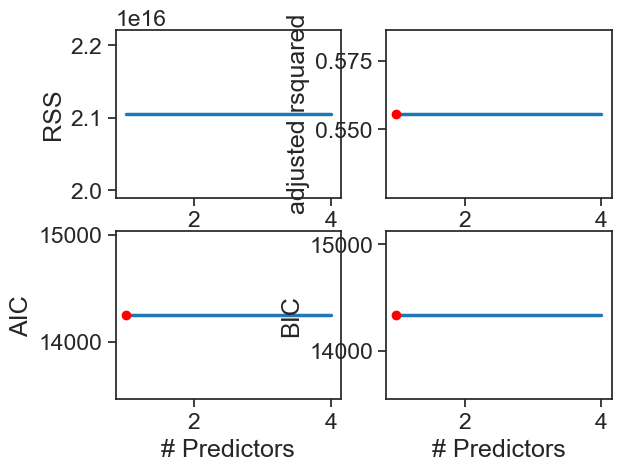

In [46]:
# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
ax = sns.lineplot(x = "kft", y = "rss", data = results)
ax.set_xlabel('# Predictors')
ax.set_ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

results["rsquared_adj"] = results.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
ax = sns.lineplot(x = "kft", y = "rsquared_adj", data = results)
plt.plot(results["rsquared_adj"].argmax()+1, results["rsquared_adj"].max(), "or")
ax.set_xlabel('# Predictors')
ax.set_ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
results["aic"] = results.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
ax = sns.lineplot(x = "kft", y = "aic", data = results)
plt.plot(results["aic"].argmin()+1, results["aic"].min(), "or")
ax.set_xlabel('# Predictors')
ax.set_ylabel('AIC')

results["bic"] = results.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
ax = sns.lineplot(x = "kft", y = "bic", data = results)
plt.plot(results["bic"].argmin()+1, results["bic"].min(), "or")
ax.set_xlabel('# Predictors')
ax.set_ylabel('BIC')

In [47]:
lr = LinearRegression()
efs1 = EFS(lr, 
           min_features=1,
           max_features=4,
           scoring='neg_mean_squared_error',
           print_progress=True,
           n_jobs=-1,
           cv=5) #5-fold

In [48]:
efs1.fit(X, y)

Features: 3000/9108IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 9108/9108

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17], [18], [19],
                                          [20], [21]],
                          max_features=4, n_jobs=-1,
                          scoring='neg_mean_squared_error')

In [49]:
efs1.best_feature_names_

('FT_PCT', 'OREB', 'STL', 'EFF')

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
## This is a time consuming process, be careful. You may consider setting --ServerApp.iopub_msg_rate_limit to a larger value or not to execute this cell
r22 = []
sub = []
kft = []
for i in range(1,20):
    efs1 = EFS(lr, 
           min_features=i,
           max_features=i,
           #scoring='neg_mean_squared_error', to calculate AIC, BIC you will need rss and the estimation of sigma (also from rss) https://xavierbourretsicotte.github.io/subset_selection.html
           scoring='r2',
           print_progress=True,
           cv = 0, #no CV 
           n_jobs=-1) #parallelism
    efs1.fit(X, y)
    best_score, best_subset = efs1.best_score_, efs1.best_feature_names_
    
    r22.append(best_score)
    sub.append(best_subset)
    kft.append(i)
    print('Progess: i = {}, done'.format(i))

Features: 231/231

Progess: i = 1, done
Progess: i = 2, done


Features: 1540/1540

Progess: i = 3, done


Features: 1205/7315IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 7315/7315

Progess: i = 4, done


Features: 1837/26334IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 6684/26334IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 11193/26334IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Notebo

Progess: i = 5, done


Features: 2248/74613IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 5415/74613IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 11753/74613IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Notebo

Progess: i = 6, done


Features: 3000/170544IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12364/170544IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 22088/170544IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Progess: i = 7, done


Features: 3000/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12354/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21792/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Features: 265857/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 276527/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 288074/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Progess: i = 8, done


Features: 3000/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12492/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21683/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Features: 267213/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 278006/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 289196/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Progess: i = 9, done


Features: 3000/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12042/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21328/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Features: 269559/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 280499/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 290102/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Features: 536565/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 548458/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 558995/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Progess: i = 10, done


Features: 3000/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 11934/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21450/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Features: 265444/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 276817/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 287519/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Features: 531814/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 542842/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 554074/705432IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Features: 88431/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 99426/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 110175/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)


Features: 353294/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 365113/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 375240/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Features: 619661/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 630069/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 641790/646646IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Progess: i = 12, done


Features: 3000/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12119/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21320/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Features: 266341/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 278064/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 289425/497420IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Progess: i = 13, done


Features: 3000/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12354/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21670/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Features: 266335/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 276866/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 287872/319770IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec

Progess: i = 14, done


Features: 3000/170544IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 11948/170544IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21062/170544IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
No

Progess: i = 15, done


Features: 3000/74613IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 12151/74613IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 21563/74613IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Noteb

Progess: i = 17, done


Features: 2209/7315IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 54/154015

Progess: i = 18, done


Features: 682/1540IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
results2 = pd.DataFrame({'kft': kft, 'r2': r22, 'sub': sub},
                           columns = ['r2', 'sub', 'kft']).set_index('kft')
results2['sub']

kft
1                                                (EFF,)
2                                           (OREB, EFF)
3                                     (FG3M, OREB, EFF)
4                                (MIN, FG3M, OREB, EFF)
5                        (FG3M, FT_PCT, OREB, STL, EFF)
6                   (MIN, FG3M, FT_PCT, OREB, STL, EFF)
7           (MIN, FG_PCT, FG3M, FT_PCT, OREB, STL, EFF)
8      (MIN, FG_PCT, FG3M, FTM, FT_PCT, OREB, STL, EFF)
9     (MIN, FG_PCT, FG3M, FTM, FT_PCT, OREB, STL, BL...
10    (FGA, FG_PCT, FG3M, FG3_PCT, FT_PCT, OREB, STL...
11    (FGA, FG_PCT, FG3M, FG3_PCT, FTM, FT_PCT, OREB...
12    (FGM, FG_PCT, FG3A, FTM, FT_PCT, OREB, DREB, A...
13    (FGM, FG_PCT, FG3A, FG3_PCT, FTM, FT_PCT, OREB...
14    (FGA, FG_PCT, FG3M, FG3_PCT, FTM, FT_PCT, OREB...
15    (MIN, FGA, FG_PCT, FG3M, FG3_PCT, FTM, FT_PCT,...
16    (MIN, FGA, FG_PCT, FG3M, FG3_PCT, FTM, FT_PCT,...
17    (MIN, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, F...
18    (MIN, FGM, FG_PCT, FG3M, FG3A, FG3_PCT

In [53]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1) 
    return 1 - (1 - r2) * coef

adj_r2 = []
for i, r2 in enumerate(r22):
    adj_r2.append(adjust_r2(r2=r2,
                  num_examples=X.shape[0],
                  num_features=i+1))

Text(0, 0.5, 'adjusted rsquared')

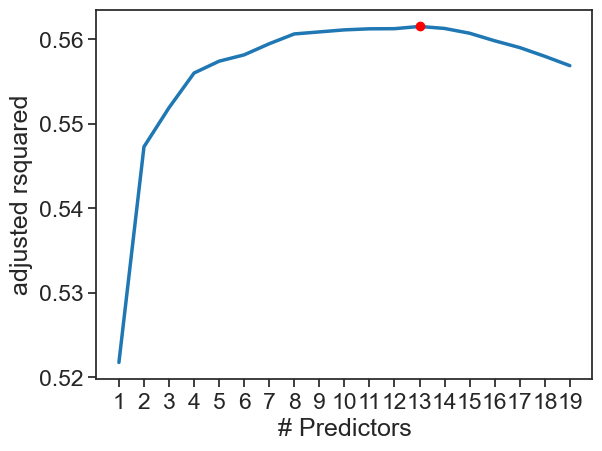

In [54]:
adj_r2 = np.array(adj_r2)
sns.lineplot(x=range(1,20), y=adj_r2)
plt.plot(adj_r2.argmax()+1, adj_r2.max(), "or")
plt.xticks(range(1,20))
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

In [55]:
results2['sub'][13]

('FGM',
 'FG_PCT',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FT_PCT',
 'OREB',
 'DREB',
 'AST',
 'STL',
 'TOV',
 'PF',
 'EFF')

In [56]:
def processSubset(X_label):
    # Fit model on feature_set and calculate RSS
    X_smf = ' + '.join(X_label)
    f     = 'salary ~ {}'.format(X_smf)
    # Fit model
    lin_reg = smf.ols(formula=f, data=pd.concat([X, y], axis=1)).fit()
    RSS = lin_reg.ssr
    return {'model': lin_reg, 'RSS': RSS}

In [57]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
      
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward(predictors):
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]

    return best_model

In [58]:
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = [] # we start with null model M0

for i in range(1,len(X.columns)+1):
    models2.loc[i] = forward(predictors)
    exog = models2.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept') #smf will automatically adds intercept
    predictors = exog
    print(i, predictors)

1 ['EFF']
2 ['EFF', 'OREB']
3 ['EFF', 'OREB', 'FG3M']
4 ['EFF', 'OREB', 'FG3M', 'MIN']
5 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK']
6 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT']
7 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT']
8 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL']
9 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM']
10 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM', 'FG3_PCT']
11 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM', 'FG3_PCT', 'PF']
12 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM', 'FG3_PCT', 'PF', 'TOV']
13 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM', 'FG3_PCT', 'PF', 'TOV', 'STL_TOV']
14 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM', 'FG3_PCT', 'PF', 'TOV', 'STL_TOV', 'AST_TOV']
15 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL', 'FTM', 'FG3_PCT', 'PF', 'TOV', 'STL_TOV', 'AST

In [59]:
bic_f = []

for m in models2.model:
    bic_f.append(m.bic)
    
np.array(bic_f).argmin()

1

In [60]:
models3 = pd.DataFrame(columns=['RSS', 'model'], index = range(1, len(X.columns)))

predictors = X.columns # we start with full model Mp
models3.loc[len(predictors)] = processSubset(predictors)

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    exog = models3.loc[len(predictors)-1]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(len(predictors), predictors)

21 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']
20 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']
19 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'AST', 'STL', 'BLK', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']
18 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'AST', 'BLK', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']
17 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'AST', 'BLK', 'PF', 'PTS', 'EFF', 'STL_TOV']
16 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'AST', 'BLK', 'PF', 'PTS', 'EFF', 'STL_TOV']
15 ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'AST', 'B

In [61]:
bic_b = []

for m in models3.model:
    bic_b.append(m.bic)
    
np.array(bic_b).argmin()

2

In [62]:
print(results2['sub'][13])
print(models2['model'][1].model.exog_names[1:]) 
print(models3['model'][2].model.exog_names[1:])

('FGM', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTM', 'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'PF', 'EFF')
['EFF']
['DREB', 'PTS']


In [63]:
lr = LinearRegression()
sfs1 = SFS(lr, 
          k_features=19, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs1.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(19, 19),
                          scoring='neg_mean_squared_error')

In [64]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(18,)","[-181731551671696.3, -55841933326465.53, -5760...",-67809443932799.039062,"(PTS,)",76307784178284.15625,59370048516934.75,29685024258467.371094
2,"(2, 18)","[-177269569084208.6, -54329706365020.29, -5870...",-66650519433922.546875,"(FGA, PTS)",74330472115372.21875,57831632556199.648438,28915816278099.820312
3,"(2, 13, 18)","[-172631092408285.78, -52449930003300.27, -559...",-64778664693305.796875,"(FGA, AST, PTS)",72190578436941.5625,56166722575159.148438,28083361287579.570312
4,"(2, 7, 13, 18)","[-165503567519586.9, -52388724575690.734, -550...",-62683252411792.039062,"(FGA, FTM, AST, PTS)",69059299273355.992188,53730481006044.78125,26865240503022.394531
5,"(2, 7, 13, 14, 18)","[-163132380158979.0, -52134441559574.984, -548...",-62087289918511.609375,"(FGA, FTM, AST, STL, PTS)",67959082738985.789062,52874475164333.007812,26437237582166.503906
6,"(2, 3, 7, 13, 14, 18)","[-161517690694968.56, -51801671794051.41, -545...",-61727889745419.421875,"(FGA, FG_PCT, FTM, AST, STL, PTS)",67076639951026.914062,52187904695819.171875,26093952347909.585938
7,"(2, 3, 7, 9, 13, 14, 18)","[-156671055801058.38, -50735267260705.12, -537...",-60563030822533.773438,"(FGA, FG_PCT, FTM, FT_PCT, AST, STL, PTS)",64520101106573.414062,50198830620807.210938,25099415310403.605469
8,"(2, 3, 7, 9, 13, 14, 18, 21)","[-155216213257241.4, -50433509663015.2, -53437...",-60426673777033.359375,"(FGA, FG_PCT, FTM, FT_PCT, AST, STL, PTS, STL_...",63592753271327.046875,49477322499931.65625,24738661249965.828125
9,"(2, 3, 7, 9, 13, 14, 16, 18, 21)","[-154126403188787.44, -50391330220375.91, -534...",-60204659821528.4375,"(FGA, FG_PCT, FTM, FT_PCT, AST, STL, TOV, PTS,...",63055704436942.742188,49059480261466.648438,24529740130733.320312
10,"(2, 3, 7, 9, 13, 14, 15, 16, 18, 21)","[-151353334177495.4, -52307307896162.14, -5057...",-60823966973021.960938,"(FGA, FG_PCT, FTM, FT_PCT, AST, STL, BLK, TOV,...",60261924885633.40625,46885824856674.296875,23442912428337.148438


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [66]:
def processSubset(X_label, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    X_smf = ' + '.join(X_label)
    f     = 'salary ~ {}'.format(X_smf)
    # Fit model
    lin_reg = smf.ols(formula=f, data=pd.concat([X_train, y_train], axis=1)).fit()
    RSS = ((lin_reg.predict(X_test[list(X_label)]) - y_test) ** 2).sum() #on test set
    return {'model': lin_reg, 'RSS': RSS}

In [67]:
def forward(predictors, X_train, y_train, X_test, y_test):

    # Pull out predictors we still need to process
    
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    #調用 processSubset 函數，
    #通過添加當前預測變量 p 來擴展當前預測變量子集，並傳遞訓練和測試數據集 X_train、y_train
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [68]:
models_test = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1): #循環迭代 X 數據集中的列數（預測變量）。
    models_test.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
    
    #從索引 i 處的最佳模型中檢索預測變量列表。
    exog = models_test.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(i, predictors)

1 ['EFF']
2 ['EFF', 'OREB']
3 ['EFF', 'OREB', 'FTM']
4 ['EFF', 'OREB', 'FTM', 'FG_PCT']
5 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF']
6 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT']
7 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT']
8 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV']
9 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB']
10 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB', 'DREB']
11 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB', 'DREB', 'STL']
12 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB', 'DREB', 'STL', 'TOV']
13 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB', 'DREB', 'STL', 'TOV', 'MIN']
14 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB', 'DREB', 'STL', 'TOV', 'MIN', 'FTA']
15 ['EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV', 'REB', 'DREB', '

TypeError: reduction operation 'argmin' not allowed for this dtype

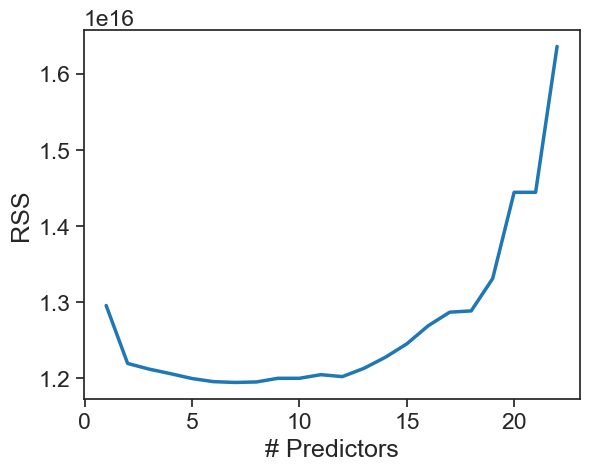

In [69]:
sns.lineplot(x=range(1,23), y=models_test['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_test['RSS'].argmin() + 1, models_test['RSS'].min(), 'or')

In [70]:
models_full = pd.DataFrame(columns=['RSS', 'model'])

predictors = []
   
for i in range(1,9):
    models_full.loc[i] = forward(predictors, X, y, X, y) #use full dataset
    exog = models_full.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(i, predictors)

1 ['EFF']
2 ['EFF', 'OREB']
3 ['EFF', 'OREB', 'FG3M']
4 ['EFF', 'OREB', 'FG3M', 'MIN']
5 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK']
6 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT']
7 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT']
8 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL']


In [71]:
print(models_test.loc[8, 'model'].model.exog_names)
print(models_full.loc[8, 'model'].model.exog_names) 

['Intercept', 'EFF', 'OREB', 'FTM', 'FG_PCT', 'PF', 'FT_PCT', 'FG3_PCT', 'STL_TOV']
['Intercept', 'EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL']


In [72]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=2)

In [73]:
# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,20))
cv_errors = cv_errors.fillna(0)

In [74]:
models_cv = pd.DataFrame(columns=["RSS", "model"])

j = 0
# Outer loop iterates over all folds
for train_index, test_index in kf.split(X):
    j = j+1
    # Reset predictors
    predictors = []
    
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold
        models_cv.loc[i] = forward(predictors, X_train2, y_train2, X_test2, y_test2)
        
        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        exog = models_cv.loc[i]['model'].model.exog_names.copy()
        exog.remove('Intercept')
        predictors = exog

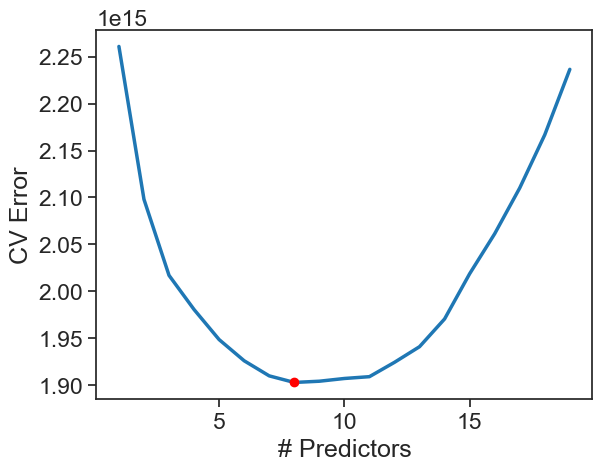

In [75]:
cv_mean = cv_errors.apply(np.mean, axis=1)

sns.lineplot(x=range(1,20), y=cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin()+1, cv_mean.min(), "or")

In [76]:
models_full = pd.DataFrame(columns=['RSS', 'model'])

predictors = []
   
for i in range(1,9):
    models_full.loc[i] = forward(predictors, X, y, X, y) #use full dataset
    exog = models_full.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(i, predictors)

1 ['EFF']
2 ['EFF', 'OREB']
3 ['EFF', 'OREB', 'FG3M']
4 ['EFF', 'OREB', 'FG3M', 'MIN']
5 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK']
6 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT']
7 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT']
8 ['EFF', 'OREB', 'FG3M', 'MIN', 'BLK', 'FT_PCT', 'FG_PCT', 'STL']


Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

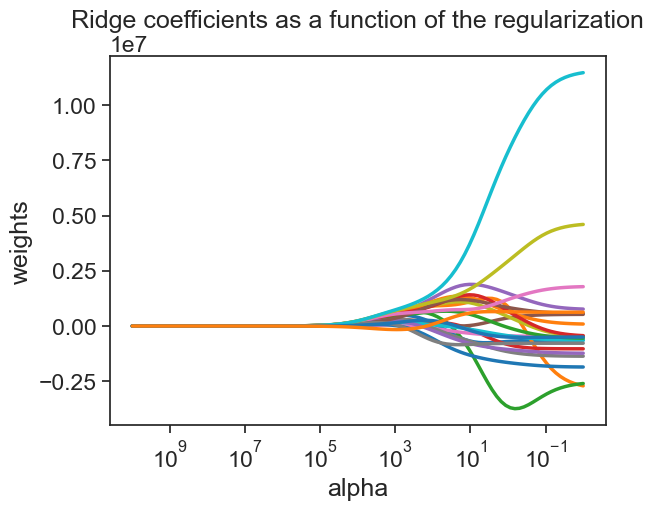

In [77]:
alphas = 10**np.linspace(10,-2,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y) # We standardize features before ridge regression
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [79]:
np.mean((np.mean(y_train) - y_test)**2)

124545691208760.73

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [81]:
model = Ridge()
model.set_params(alpha=10**10)
X_scale = scaler.transform(X_train)
model.fit(X_scale, y_train)
X_scale_t = scaler.transform(X_test)
pred = model.predict(X_scale_t)
mean_squared_error(y_test, pred)

124545666100612.44

In [82]:
validation_score = []
X_scale_t = scaler.transform(X_test)
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_scale,y_train) #compare normalize=True vs standardize
    validation_score.append(mean_squared_error(model.predict(X_scale_t),y_test))

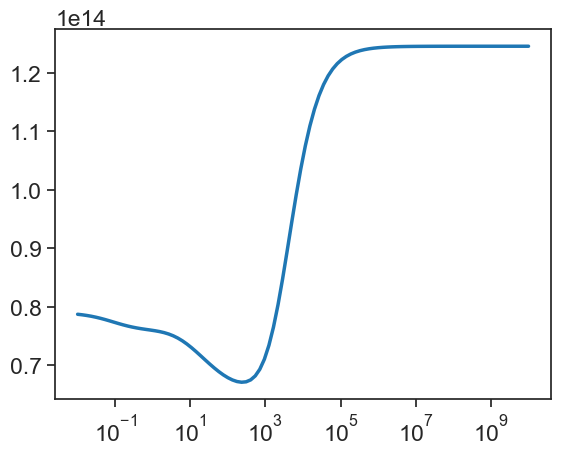

In [83]:
sns.lineplot(x=alphas,y=validation_score)
plt.xscale('log')

In [84]:
np.argmin(validation_score)

63

In [85]:
alphas[63], validation_score[63]

(231.0129700083158, 67098390377917.65)

In [86]:
kf = KFold(n_splits=10, shuffle=True, random_state=2)
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=kf)
ridgecv.fit(X_scale, y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=KFold(n_splits=10, random_state=2, shuffle=True),
        scoring='neg_mean_squared_error')

In [87]:
ridgecv.alpha_

75.64633275546291

In [88]:
model.set_params(alpha=ridgecv.alpha_)
model.fit(X_scale, y_train)
mean_squared_error(y_test, model.predict(X_scale_t))

68351599962611.87

In [89]:
model.fit(scale(X), y)

Ridge(alpha=75.64633275546291)

In [90]:
pd.Series(model.coef_.flatten(), index=X.columns)

MIN        2.598631e+04
FGM        9.172458e+05
FGA        4.184404e+05
FG_PCT     1.668157e+05
FG3M       1.387441e+06
FG3A       1.089776e+05
FG3_PCT   -1.270223e+05
FTM       -1.728869e+05
FTA        9.656751e+05
FT_PCT     3.105672e+04
OREB      -6.854907e+05
DREB       1.182632e+06
REB        6.609993e+05
AST        9.890288e+05
STL       -2.873504e+05
BLK        1.029716e+06
TOV        6.918578e+05
PF        -7.239376e+05
PTS        1.133235e+06
EFF        1.642483e+06
AST_TOV    2.157538e+05
STL_TOV    1.534894e+05
dtype: float64

In [91]:
ridgeloocv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', gcv_mode='auto')
ridgeloocv.fit(X_scale, y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        gcv_mode='auto', scoring='neg_mean_squared_error')

In [92]:
ridgeloocv.alpha_

57.2236765935022

In [93]:
model.set_params(alpha=ridgeloocv.alpha_)
model.fit(X_scale, y_train)
mean_squared_error(y_test, model.predict(X_scale_t))

68914264189855.65

In [94]:
model.fit(scale(X), y)

Ridge(alpha=57.2236765935022)

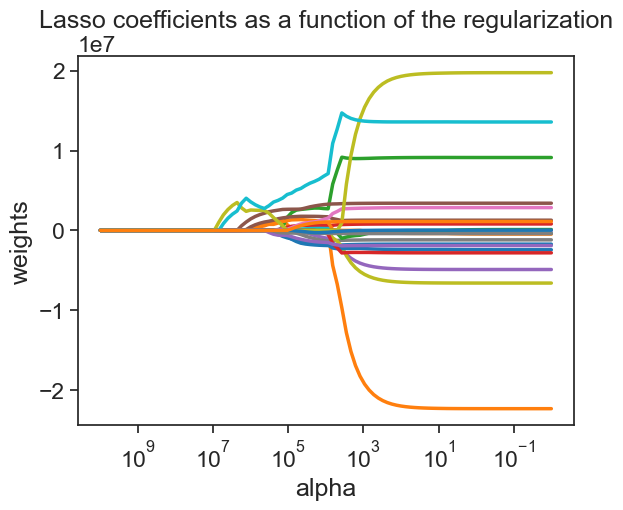

In [95]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [96]:
kf = KFold(n_splits=10, shuffle=True, random_state=2)
lassocv = LassoCV(alphas=None, cv=kf, max_iter=10000)
lassocv.fit(X_scale, y_train.values.ravel())

LassoCV(cv=KFold(n_splits=10, random_state=2, shuffle=True), max_iter=10000)

In [97]:
lassocv.alpha_

570025.2308415

In [98]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_scale, y_train)
mean_squared_error(y_test, lasso.predict(X_scale_t))

69112057218114.28

In [99]:
# fit the full model
lasso.fit(scale(X), y)

Lasso(alpha=570025.2308415, max_iter=10000)

In [100]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

MIN        0.000000e+00
FGM        0.000000e+00
FGA        0.000000e+00
FG_PCT    -0.000000e+00
FG3M       1.136643e+06
FG3A       0.000000e+00
FG3_PCT   -0.000000e+00
FTM        0.000000e+00
FTA        0.000000e+00
FT_PCT     0.000000e+00
OREB      -0.000000e+00
DREB       0.000000e+00
REB        0.000000e+00
AST        4.229921e+04
STL       -0.000000e+00
BLK        0.000000e+00
TOV        2.567325e+05
PF        -0.000000e+00
PTS        1.356882e+06
EFF        5.383458e+06
AST_TOV    0.000000e+00
STL_TOV   -0.000000e+00
dtype: float64

# 預測薪水

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用最佳子集的特徵來訓練模型
X_train_subset = X_train[['FGM', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTM', 'FT_PCT', 'OREB', 'REB', 'AST', 'STL', 'TOV', 'PF', 'EFF']]
X_test_subset = X_test[['FGM', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTM', 'FT_PCT', 'OREB', 'REB', 'AST', 'STL', 'TOV', 'PF', 'EFF']]

model = LinearRegression()
model.fit(X_train_subset, y_train)

# 預測並計算MSE
y_pred = model.predict(X_test_subset)
mse = mean_squared_error(y_test, y_pred)

print("Best Subset Features:", X_train_subset.columns.tolist())
print("Best Subset MSE:", mse)

Best Subset Features: ['FGM', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTM', 'FT_PCT', 'OREB', 'REB', 'AST', 'STL', 'TOV', 'PF', 'EFF']
Best Subset MSE: 66095370227431.39


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用前向選擇得到的最佳子集的特徵來訓練模型
selected_features = ['EFF']
X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_subset, y_train)

# 預測並計算MSE
y_pred = model.predict(X_test_subset)
mse = mean_squared_error(y_test, y_pred)

print("Forward Selected Features:", selected_features)
print("Forward Selected Features MSE:", mse)

Forward Selected Features: ['EFF']
Forward Selected Features MSE: 62591554252677.47


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 使用後向選擇得到的最佳子集的特徵來訓練模型
selected_features = ['DREB', 'PTS']
X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_subset, y_train)

# 預測並計算MSE
y_pred = model.predict(X_test_subset)
mse = mean_squared_error(y_test, y_pred)

print("Backward Selected Features:", selected_features)
print("Backward Selected Features MSE:", mse)

Backward Selected Features: ['DREB', 'PTS']
Backward Selected Features MSE: 64146096308035.805


In [104]:
complete_df2

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,salary
0,36.918919,9.824324,21.067568,0.466,3.243243,0.125274,0.350,0.096969,8.405405,0.854,...,4.621622,1.054054,0.689189,2.878378,2.162162,30.067568,29.851351,1.61,0.37,30351780.0
1,34.606061,11.030303,20.121212,0.548,1.000000,0.045914,0.330,0.151745,11.681818,0.857,...,4.151515,1.000000,1.696970,3.424242,3.106061,33.075758,35.893939,1.21,0.29,33616770.0
2,36.227273,10.893939,21.954545,0.496,2.803030,0.124197,0.342,0.118228,10.515152,0.742,...,8.015152,1.363636,0.500000,3.575758,2.515152,32.393939,33.545455,2.24,0.38,37096500.0
3,35.529412,10.352941,20.308824,0.510,0.852941,0.036332,0.345,0.144680,10.867647,0.905,...,5.455882,1.647059,0.955882,2.823529,2.823529,31.397059,30.485294,1.93,0.58,30913750.0
4,32.126984,11.222222,20.285714,0.553,0.746032,0.043084,0.275,0.125472,12.253968,0.645,...,5.698413,0.825397,0.809524,3.904762,3.126984,31.095238,32.888889,1.46,0.21,42492492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,14.466667,2.466667,3.933333,0.627,0.000000,0.008889,0.000,0.106667,2.333333,0.686,...,0.666667,0.200000,0.266667,0.933333,2.200000,6.533333,8.800000,0.71,0.21,517060.0
448,14.466667,2.466667,3.933333,0.627,0.000000,0.008889,0.000,0.106667,2.333333,0.686,...,0.666667,0.200000,0.266667,0.933333,2.200000,6.533333,8.800000,0.71,0.21,517060.0
450,8.075000,0.775000,2.175000,0.356,0.550000,0.038750,0.355,0.006875,0.325000,0.846,...,1.150000,0.150000,0.025000,0.300000,0.850000,2.375000,3.525000,3.83,0.50,1836090.0
454,6.527778,0.861111,1.750000,0.492,0.361111,0.025463,0.394,0.010802,0.444444,0.875,...,0.888889,0.166667,0.111111,0.250000,0.611111,2.472222,3.888889,3.56,0.67,1836090.0


In [105]:
complete_df2.corr()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,salary
MIN,1.000000,0.867918,0.875947,0.002301,0.634828,0.461365,0.114411,0.544799,0.693266,0.312300,...,0.694830,0.713376,0.279514,0.763505,0.625402,0.864162,0.857989,0.189831,-0.109372,0.633998
FGM,0.867918,1.000000,0.973986,0.129250,0.580576,0.463163,0.085214,0.738332,0.864643,0.292871,...,0.685765,0.580238,0.284372,0.855861,0.505181,0.990500,0.933789,0.030256,-0.301429,0.709227
FGA,0.875947,0.973986,1.000000,-0.063107,0.696212,0.587257,0.139249,0.705740,0.819540,0.364278,...,0.713112,0.600634,0.166254,0.852913,0.456787,0.979450,0.863725,0.085631,-0.275371,0.683879
FG_PCT,0.002301,0.129250,-0.063107,1.000000,-0.407883,-0.461913,-0.246209,0.123896,0.175560,-0.357224,...,-0.085501,-0.069150,0.471875,0.060752,0.235642,0.067355,0.286119,-0.320884,-0.194497,0.083744
FG3M,0.634828,0.580576,0.696212,-0.407883,1.000000,0.792931,0.386563,0.283203,0.337991,0.517382,...,0.461937,0.413073,-0.145134,0.453143,0.157269,0.636350,0.435018,0.214909,-0.029366,0.459633
FG3A,0.461365,0.463163,0.587257,-0.461913,0.792931,1.000000,0.294062,0.450676,0.262975,0.427756,...,0.416597,0.315929,-0.169359,0.410501,0.130378,0.506341,0.315984,0.201838,-0.035668,0.345453
FG3_PCT,0.114411,0.085214,0.139249,-0.246209,0.386563,0.294062,1.000000,0.025349,-0.006311,0.332017,...,0.130933,0.081563,-0.212067,0.063943,-0.077125,0.120930,0.014478,0.166003,0.033383,0.063028
FTM,0.544799,0.738332,0.705740,0.123896,0.283203,0.450676,0.025349,1.000000,0.844523,0.242287,...,0.546498,0.384475,0.182692,0.712687,0.375817,0.763053,0.713522,-0.015677,-0.298617,0.513327
FTA,0.693266,0.864643,0.819540,0.175560,0.337991,0.262975,-0.006311,0.844523,1.000000,0.194960,...,0.600052,0.468133,0.295067,0.807323,0.462272,0.892005,0.858784,-0.051462,-0.325368,0.634924
FT_PCT,0.312300,0.292871,0.364278,-0.357224,0.517382,0.427756,0.332017,0.242287,0.194960,1.000000,...,0.283782,0.217053,-0.256735,0.204263,-0.016515,0.346546,0.200859,0.238476,0.001426,0.204911


In [106]:
X1 = complete_df2[['MIN','PTS','EFF','FGM','FGA','DREB','AST','TOV']]
y1 = complete_df2['salary'] # put Salary as response variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.5)


model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)


#mse = mean_squared_error(y_test1, y_pred1)
#％print(f"Mean Squared Error: {mse}")


new_player_features = [[35.9,30.1,23.7,9.8,21.1,7.7,1.1,2.9]]  
predicted_salary = model.predict(new_player_features)
print(f"Predicted Salary for the Jaylen Brown: {predicted_salary[0]}")

Predicted Salary for the Jayson Tatum: 28186394.43891473


# 球隊

In [ ]:
id=1610612737
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
ATL2022=team.head(40)
ATL2022

In [ ]:
id=1610612738
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
BOS2022=team.head(40)
BOS2022

In [ ]:
id=1610612739
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
CLE2022=team.head(40)
CLE2022

In [ ]:
id=1610612740
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
NOP2022=team.head(40)
NOP2022

In [ ]:
id=1610612741
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
CHI2022=team.head(40)
CHI2022

In [ ]:
id=1610612742
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
DAL2022=team.head(40)
DAL2022

In [ ]:
id=1610612743
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
DEN2022=team.head(40)
DEN2022

In [ ]:
id=1610612744
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
GSW2022=team.head(40)
GSW2022

In [ ]:
id=1610612745
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
HOU2022=team.head(40)
HOU2022

In [ ]:
id=1610612746
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
LAC2022=team.head(40)
LAC2022

In [ ]:
id=1610612747
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
LAL2022=team.head(40)
LAL2022

In [ ]:
id=1610612748
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
MIA2022=team.head(40)
MIA2022

In [ ]:
id=1610612749
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
MIL2022=team.head(40)
MIL2022

In [ ]:
id=1610612750
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
MIN2022=team.head(40)
MIN2022

In [ ]:
id=1610612751
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
BKN2022=team.head(40)
BKN2022

In [ ]:
id=1610612752
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
NYK2022=team.head(40)
NYK2022

In [ ]:
id=1610612753
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
ORL2022=team.head(40)
ORL2022

In [ ]:
id=1610612754
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
IND2022=team.head(40)
IND2022

In [ ]:
id=1610612755
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
PHI2022=team.head(40)
PHI2022

In [ ]:
id=1610612756
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
PHX2022=team.head(40)
PHX2022

In [ ]:
id=1610612757
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
POR2022=team.head(40)
POR2022

In [ ]:
id=1610612758
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
SAC2022=team.head(40)
SAC2022

In [ ]:
id=1610612759
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
SAS2022=team.head(40)
SAS2022

In [ ]:
id=1610612760
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
OKC2022=team.head(40)
OKC2022

In [ ]:
id=1610612761
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
TOR2022=team.head(40)
TOR2022

In [ ]:
id=1610612762
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
UTA2022=team.head(40)
UTA2022

In [ ]:
id=1610612763
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
MEM2022=team.head(40)
MEM2022

In [ ]:
id=1610612764
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
WAS2022=team.head(40)
WAS2022

In [ ]:
id=1610612765
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
DET2022=team.head(40)
DET2022

In [ ]:
id=1610612766
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
team = gamefinder.get_data_frames()[0] 

team = team.dropna()
team['EFF'] =team.PTS+team.REB+team.AST+team.STL+team.BLK-team.FGA+team.FGM-team.FTA+team.FTM-team.TOV
team['eFG'] =(team.FGM+0.5*team.FG3M)/team.FGA
team['TS'] =team.PTS/(2*(team.FGA+0.44*team.FTA))

#team2022=team[team['SEASON_ID']=='22022']
CHA2022=team.head(40)
CHA2022

In [ ]:
CHA2022.describe()

In [ ]:
BOS2022.describe()

In [ ]:
team=team_dict.drop(columns=["id","full_name","nickname","city",
                             "state","year_founded"])
team['PTS']=ATL2022PTS,BOS2022PTS,CLE2022PTS ,NOP2022PTS ,CHI2022PTS ,DAL2022PTS ,DEN2022PTS ,GSW2022PTS ,HOU2022PTS ,LAC2022PTS ,LAL2022PTS ,MIA2022PTS ,MIL2022PTS ,MIN2022PTS ,BKN2022PTS ,NYK2022PTS ,ORL2022PTS,IND2022PTS ,PHI2022PTS ,PHX2022PTS ,POR2022PTS ,SAC2022PTS ,SAS2022PTS, OKC2022PTS ,TOR2022PTS ,UTA2022PTS ,MEM2022PTS ,WAS2022PTS ,DET2022PTS ,CHA2022PTS 
team['FG_PCT']=ATL2022FG_PCT,BOS2022FG_PCT,CLE2022FG_PCT ,NOP2022FG_PCT ,CHI2022FG_PCT ,DAL2022FG_PCT ,DEN2022FG_PCT,GSW2022FG_PCT ,HOU2022FG_PCT ,LAC2022FG_PCT ,LAL2022FG_PCT,MIA2022FG_PCT,MIL2022FG_PCT,MIN2022FG_PCT ,BKN2022FG_PCT ,NYK2022FG_PCT ,ORL2022FG_PCT,IND2022FG_PCT ,PHI2022FG_PCT,PHX2022FG_PCT,POR2022FG_PCT,SAC2022FG_PCT ,SAS2022FG_PCT, OKC2022FG_PCT ,TOR2022FG_PCT,UTA2022FG_PCT ,MEM2022FG_PCT ,WAS2022FG_PCT ,DET2022FG_PCT,CHA2022FG_PCT 
team

In [ ]:
ATL2022PTS = ATL2022['PTS'].mean()
BOS2022PTS = BOS2022['PTS'].mean()
CLE2022PTS = CLE2022['PTS'].mean()
NOP2022PTS = NOP2022['PTS'].mean()
CHI2022PTS = CHI2022['PTS'].mean()
DAL2022PTS = DAL2022['PTS'].mean()
DEN2022PTS = DEN2022['PTS'].mean()
GSW2022PTS = GSW2022['PTS'].mean()
HOU2022PTS = HOU2022['PTS'].mean()
LAC2022PTS = LAC2022['PTS'].mean()
LAL2022PTS = LAL2022['PTS'].mean()
MIA2022PTS = MIA2022['PTS'].mean()
MIL2022PTS = MIL2022['PTS'].mean()
MIN2022PTS = MIN2022['PTS'].mean()
BKN2022PTS = BKN2022['PTS'].mean()
NYK2022PTS = NYK2022['PTS'].mean()
ORL2022PTS = ORL2022['PTS'].mean()
IND2022PTS = IND2022['PTS'].mean()
PHI2022PTS = PHI2022['PTS'].mean()
PHX2022PTS = PHX2022['PTS'].mean()
POR2022PTS = POR2022['PTS'].mean()
SAC2022PTS = SAC2022['PTS'].mean()
SAS2022PTS = SAS2022['PTS'].mean()
OKC2022PTS = OKC2022['PTS'].mean()
TOR2022PTS = TOR2022['PTS'].mean()
UTA2022PTS = UTA2022['PTS'].mean()
MEM2022PTS = MEM2022['PTS'].mean()
WAS2022PTS = WAS2022['PTS'].mean()
DET2022PTS = DET2022['PTS'].mean()
CHA2022PTS = CHA2022['PTS'].mean()

In [ ]:
ATL2022FG_PCT = ATL2022['FG_PCT'].mean()
BOS2022FG_PCT = BOS2022['FG_PCT'].mean()
CLE2022FG_PCT = CLE2022['FG_PCT'].mean()
NOP2022FG_PCT = NOP2022['FG_PCT'].mean()
CHI2022FG_PCT = CHI2022['FG_PCT'].mean()
DAL2022FG_PCT = DAL2022['FG_PCT'].mean()
DEN2022FG_PCT = DEN2022['FG_PCT'].mean()
GSW2022FG_PCT = GSW2022['FG_PCT'].mean()
HOU2022FG_PCT = HOU2022['FG_PCT'].mean()
LAC2022FG_PCT = LAC2022['FG_PCT'].mean()
LAL2022FG_PCT = LAL2022['FG_PCT'].mean()
MIA2022FG_PCT = MIA2022['FG_PCT'].mean()
MIL2022FG_PCT = MIL2022['FG_PCT'].mean()
MIN2022FG_PCT = MIN2022['FG_PCT'].mean()
BKN2022FG_PCT = BKN2022['FG_PCT'].mean()
NYK2022FG_PCT = NYK2022['FG_PCT'].mean()
ORL2022FG_PCT = ORL2022['FG_PCT'].mean()
IND2022FG_PCT = IND2022['FG_PCT'].mean()
PHI2022FG_PCT = PHI2022['FG_PCT'].mean()
PHX2022FG_PCT = POR2022['FG_PCT'].mean()
POR2022FG_PCT = POR2022['FG_PCT'].mean()
SAC2022FG_PCT = SAC2022['FG_PCT'].mean()
SAS2022FG_PCT = SAS2022['FG_PCT'].mean()
OKC2022FG_PCT = OKC2022['FG_PCT'].mean()
TOR2022FG_PCT = TOR2022['FG_PCT'].mean()
UTA2022FG_PCT = UTA2022['FG_PCT'].mean()
MEM2022FG_PCT = MEM2022['FG_PCT'].mean()
WAS2022FG_PCT = WAS2022['FG_PCT'].mean()
DET2022FG_PCT = DET2022['FG_PCT'].mean()
CHA2022FG_PCT = CHA2022['FG_PCT'].mean()

In [ ]:
import pandas
import math 
import matplotlib
import matplotlib.pyplot as plt

mainColor = (42/256, 87/256, 141/256, 1);

#font = {'family': 'SimHei','size': 20 }
#matplotlib.re('font',**font);

fig=plt.figure(figsize=(30,20),dpi=100)
               
sp=fig.add_subplot()
#sp.set_xlim([0,team.PTS])
#sp.set_ylim(team.FGA)
#sp.get_xaxis().set_ticks([])
#sp.get_yaxis().set_ticks([])

sp.scatter(team.PTS,team.FG_PCT,alpha=0.5,s=200,marker='o',edgecolors=mainColor,linewidths=5)
sp.axvline(x=team.PTS.mean(),linewidth=1,color='k')
sp.axhline(y=team.FG_PCT.mean(),linewidth=1,color='k')
sp.set_xlabel('PTS',fontsize=50)
sp.set_ylabel('FG_PCT',fontsize=50)
team.apply(lambda row:plt.text(row.PTS,row.FG_PCT,row.abbreviation,fontsize=15),axis=1)
plt.style.use("ggplot") 
plt.show()


In [ ]:
# get data
x = CHA2022['PTS']
y = CHA2022['AST']
marker_sizes = CHA2022['TOV']

# plot data
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o', s=marker_sizes)
plt.show()